## Automating National Briefings
Author: Smitha Mahesh, Eric Englin

Purpose: To complete the analyses and visualizations required for the national-level briefings. 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns


In [2]:
myworkingdirectory = r"C:\Users\Eric.Englin\DOT OST\volpe-proj-VU16A100 - Transportation Safety Program\Region Briefing\Data\Output Data"
os.chdir(myworkingdirectory)

In [3]:
analysis_2022 = pd.read_csv("analysis_database_2022.csv")

# National Data Trends 

### Table 1:  Servicewide Fatal and Injury Crash Types (1990-2021, data from STARS, CDS, IMARS) 

In [4]:
print(round(len(analysis_2022.loc[analysis_2022['VRU']==1])/len(analysis_2022)*100,2), "% of total crashes involve VRUs")


vru_serious_injury = sum(analysis_2022.loc[(analysis_2022['Incapacitating Injury']==1)&(analysis_2022['VRU']==1)]['Num_Injuries'])
vru_injury = sum(analysis_2022.loc[(analysis_2022['Injury or Fatal']==1)&(analysis_2022['VRU']==1)]['Num_Injuries'])
vru_fatals = sum(analysis_2022.loc[(analysis_2022['Fatality']==1)&(analysis_2022['VRU']==1)]['Num_Fatalities'])

print(int(vru_injury+vru_fatals), "injuries or fatalities")
print(int(vru_serious_injury), "serious injuries")
print(int(vru_fatals), "fatalities")



1.37 % of total crashes involve VRUs
1239 injuries or fatalities
237 serious injuries
23 fatalities


In [5]:
print(round(len(analysis_2022.loc[analysis_2022['Involving Animal']==1])/len(analysis_2022)*100,2), "% of total crashes involve Animals")


animal_serious_injury = sum(analysis_2022.loc[(analysis_2022['Incapacitating Injury']==1)&(analysis_2022['Involving Animal']==1)]['Num_Injuries'])
animal_injury = sum(analysis_2022.loc[(analysis_2022['Injury or Fatal']==1)&(analysis_2022['Involving Animal']==1)]['Num_Injuries'])
animal_fatals = sum(analysis_2022.loc[(analysis_2022['Fatality']==1)&(analysis_2022['Involving Animal']==1)]['Num_Fatalities'])

print(int(animal_injury+animal_fatals), "injuries or fatalities")
print(int(animal_serious_injury), "serious injuries")
print(int(animal_fatals), "fatalities")



11.03 % of total crashes involve Animals
2806 injuries or fatalities
295 serious injuries
26 fatalities


## Figure 1: Crashes involving VRUs and Animals by posted speed

In [6]:
#need to figure out Fatality vs Num_Fatalities
analysis_2022.Fatality.value_counts(), analysis_2022.Num_Fatalities.value_counts()

(0.0     204956
 1.0        910
 2.0        134
 3.0         40
 4.0         31
 6.0         10
 8.0          9
 5.0          7
 10.0         4
 14.0         3
 12.0         2
 13.0         2
 18.0         1
 17.0         1
 7.0          1
 Name: Fatality, dtype: int64,
  0.0    204509
  1.0       955
  2.0       105
  3.0        14
  4.0         5
  5.0         4
  6.0         2
 -2.0         1
 Name: Num_Fatalities, dtype: int64)

In [7]:
def create_speed_table(crash_group=1, injury_type=1, injury_type2 = 1):
    #create dataframe to have number of crashes by crash groups (e.g. animals involved, VRUs, etc.)
    #can also add in filters for different injury severity. These can be combined as well. 
    
    if crash_group != 1:
        df = analysis_2022.loc[analysis_2022[crash_group]==1]
    else: 
        df = analysis_2022
        
        
    if injury_type !=1:
        if injury_type2 != 1:
            df = df.loc[(df[injury_type]>0)|(df[injury_type2]>0)]
        else:
            df = df.loc[df[injury_type]>0]
    
    speed_list = []
    
    for x in ['5_mph', '10_mph', '15_mph', '20_mph', '25_mph',
       '30_mph', '35_mph', '40_mph', '45_mph', '50_mph', '55_mph', '60_mph',
       '65_mph', '70_mph', '75_mph']:
        speed_list.append(df[x].sum())
        
    
    
    df_final = pd.DataFrame({'Posted Speed':[5,10,15,20,25,30,35,40,45,50,55, 60, 65, 70, 75], 
                               'Total Crashes':speed_list})
    
    return df_final


In [8]:
create_speed_table('VRU', 'Fatality', 'Incapacitating Injury')

,Posted Speed,Total Crashes
0,5,4.0
1,10,2.0
2,15,48.0
3,20,12.0
4,25,149.0
5,30,41.0
6,35,54.0
7,40,9.0
8,45,47.0
9,50,22.0


In [9]:
df_by_speed = create_speed_table()

VRU_by_speed = create_speed_table('VRU')

Animals_by_speed = create_speed_table('Involving Animal')

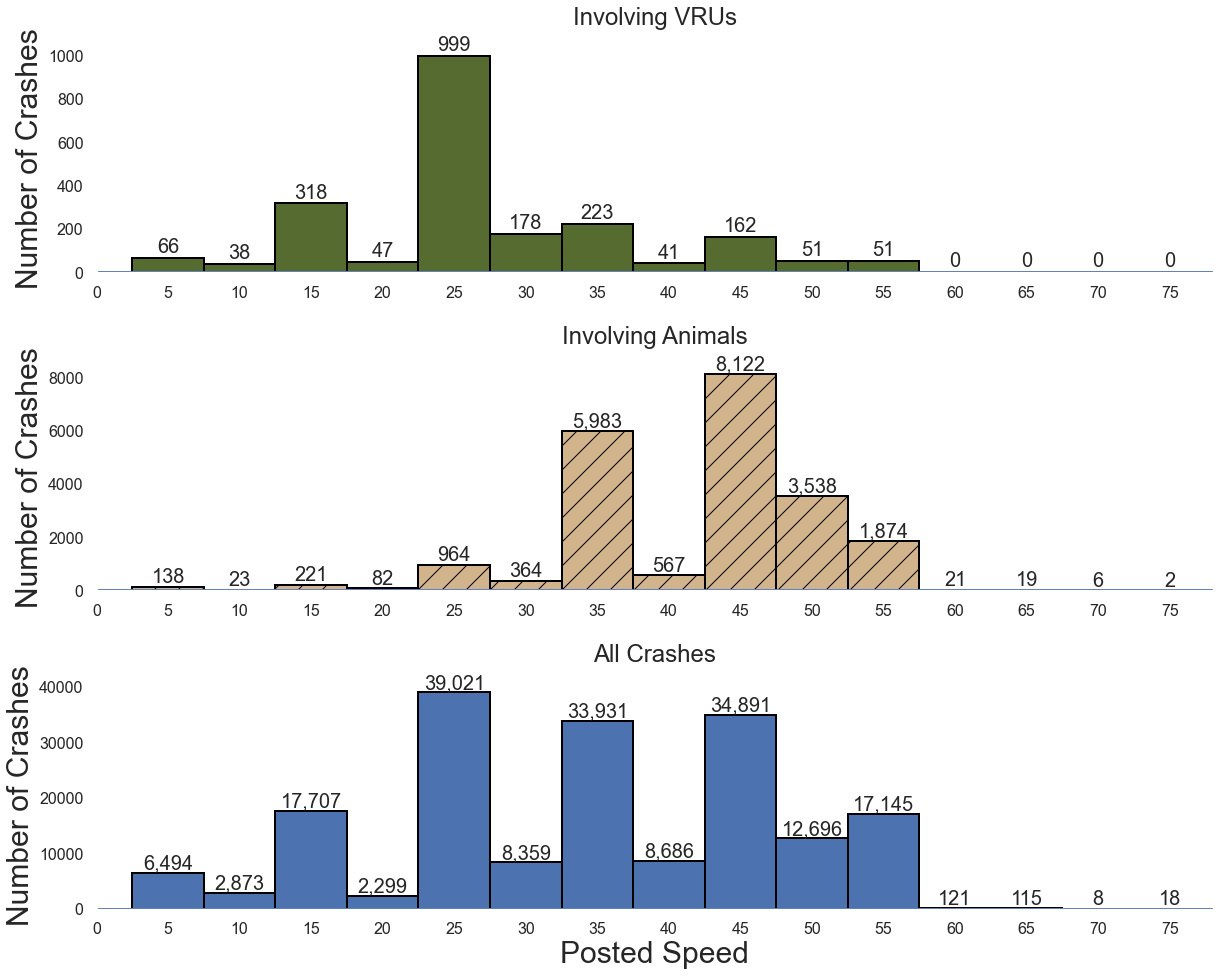

In [12]:
#graph_title = "No Commercial Vehicle Sign Locations by Physical Locations on BLRI Parkway"
axis_title = "Number of Crashes Involving VRUs"
plt.style.use('seaborn')
sns.set(rc={'axes.facecolor':'1', 'figure.facecolor':'white', 'patch.linewidth': 0.0})
fig, ax = plt.subplots(3,1,figsize=(20,15))
tick_spacing = 5


ax[0].bar(VRU_by_speed['Posted Speed'],
        VRU_by_speed['Total Crashes'],
        width = 5, color = 'darkolivegreen', edgecolor = "black", linewidth=2)

ax[1].bar(Animals_by_speed['Posted Speed'],
        Animals_by_speed['Total Crashes'],
        width = 5, hatch = "/", color = "tan", edgecolor = "black", linewidth=2)

ax[2].bar(df_by_speed['Posted Speed'],
        df_by_speed['Total Crashes'],
        width = 5, edgecolor = "black", linewidth=2)


#bar_max = 1.15*max(max(VRU_by_speed['Total Crashes']), max(Animals_by_speed['Total Crashes']))

#ax.set_ylim([0, bar_max])
#ax.set_xlim([0, 58])
ax[0].set_title("Involving VRUs",fontsize= 24, pad = 20) # title of plot
ax[1].set_title("Involving Animals",fontsize= 24, pad = 20) # title of plot
ax[2].set_title("All Crashes",fontsize= 24, pad = 20) # title of plot

# Make some labels.
rects = ax[0].patches
labels = [f"label{i}" for i in range(len(rects))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    label = '{:,}'.format(int(height))
    ax[0].text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",fontsize=20
    )

# Make some labels.
rects = ax[1].patches
labels = [f"label{i}" for i in range(len(rects))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    label = '{:,}'.format(int(height))
    ax[1].text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",fontsize=20
    )

    # Make some labels.
rects = ax[2].patches
labels = [f"label{i}" for i in range(len(rects))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    label = '{:,}'.format(int(height))
    ax[2].text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",fontsize=20
    )

    
#ax[0].set_ylim([0, bar_max])
ax[0].set_xlim([0, 78])
ax[0].hlines(0, xmin = 0, xmax = 78, linewidth = 3)
ax[0].xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax[0].set_ylabel("Number of Crashes", fontsize = 30)#ylabel
ax[0].tick_params(axis='x', which='major', labelsize=16)
ax[0].tick_params(axis='y', which='major', labelsize=16)
ax[0].tick_params(axis='both', which='minor', labelsize=8)

ax[1].set_xlim([0, 78])
ax[1].hlines(0, xmin = 0, xmax = 78, linewidth = 3)
ax[1].xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax[1].set_ylabel("Number of Crashes", fontsize = 30)#ylabel
ax[1].tick_params(axis='x', which='major', labelsize=16)
ax[1].tick_params(axis='y', which='major', labelsize=16)
ax[1].tick_params(axis='both', which='minor', labelsize=8)

ax[2].set_xlim([0, 78])
ax[2].hlines(0, xmin = 0, xmax = 78, linewidth = 3)
ax[2].xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax[2].set_xlabel('Posted Speed',fontsize = 30) #xlabel
ax[2].set_ylabel("Number of Crashes", fontsize = 30)#ylabel
ax[2].tick_params(axis='x', which='major', labelsize=16)
ax[2].tick_params(axis='y', which='major', labelsize=16)
ax[2].tick_params(axis='both', which='minor', labelsize=8)


#plt.title(graph_title,fontsize=34)
# set the spacing between subplots
plt.subplots_adjust(
                    bottom=0.1, 
                    
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

plt.show()

In [13]:
VRU_by_speed_fatals = create_speed_table('VRU', 'Fatality')
VRU_by_speed_serious_injury = create_speed_table('VRU', 'Incapacitating Injury')


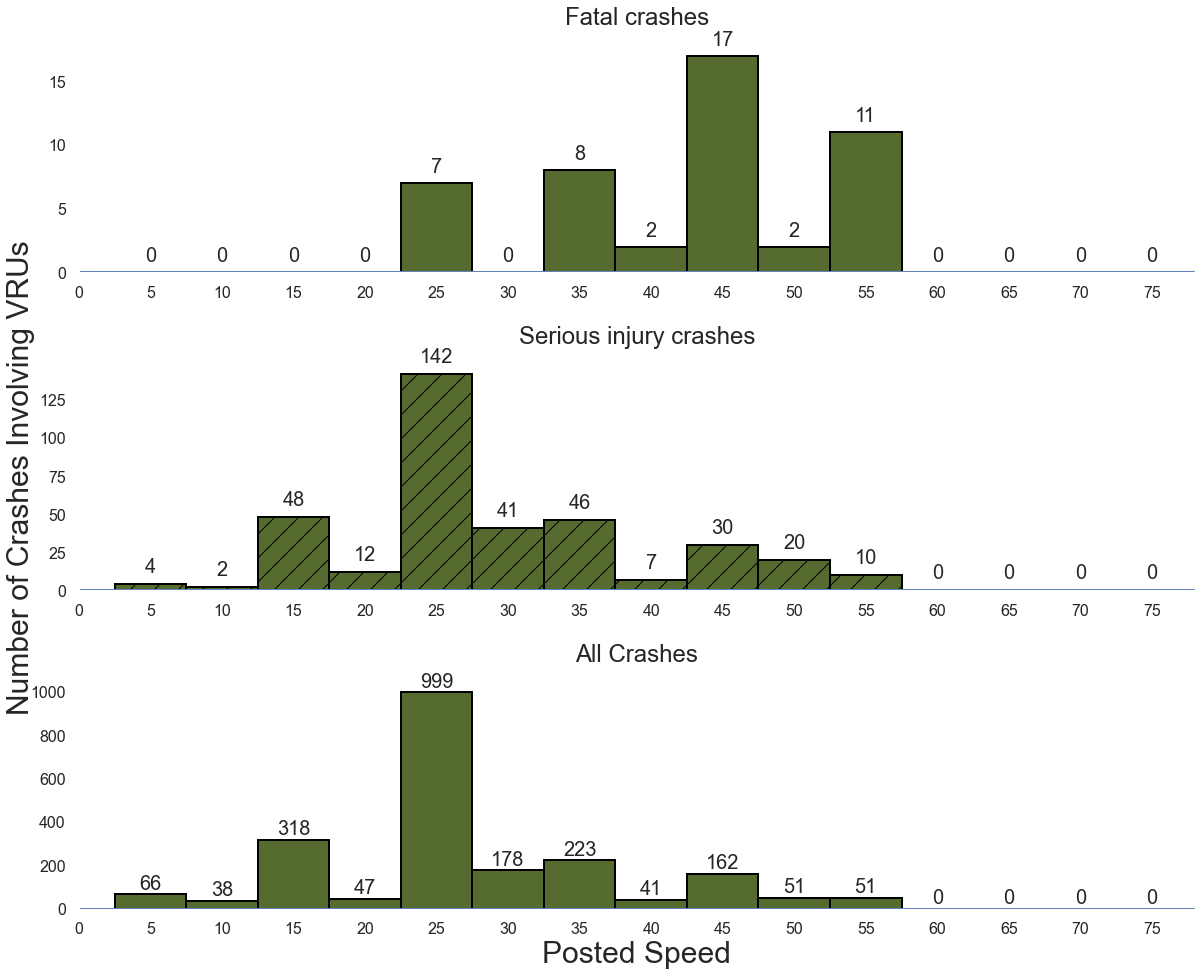

In [15]:
#graph_title = "No Commercial Vehicle Sign Locations by Physical Locations on BLRI Parkway"
axis_title = "Number of Crashes Involving VRUs"
plt.style.use('seaborn')
sns.set(rc={'axes.facecolor':'1', 'figure.facecolor':'white', 'patch.linewidth': 0.0})
fig, ax = plt.subplots(3,1,figsize=(20,15))
tick_spacing = 5


ax[0].bar(VRU_by_speed_fatals['Posted Speed'],
        VRU_by_speed_fatals['Total Crashes'],
        width = 5, color = 'darkolivegreen', edgecolor = "black", linewidth=2)

ax[1].bar(VRU_by_speed_serious_injury['Posted Speed'],
        VRU_by_speed_serious_injury['Total Crashes'],
        width = 5, hatch = "/", color = 'darkolivegreen', edgecolor = "black", linewidth=2)

ax[2].bar(VRU_by_speed['Posted Speed'],
        VRU_by_speed['Total Crashes'],
        width = 5, color = 'darkolivegreen', edgecolor = "black", linewidth=2)


#bar_max = 1.15*max(max(VRU_by_speed['Total Crashes']), max(Animals_by_speed['Total Crashes']))

#ax.set_ylim([0, bar_max])
#ax.set_xlim([0, 58])
ax[0].set_title("Fatal crashes",fontsize= 24, pad = 20) # title of plot
ax[1].set_title("Serious injury crashes",fontsize= 24, pad = 20) # title of plot
ax[2].set_title("All Crashes",fontsize= 24, pad = 20) # title of plot

# Make some labels.
rects = ax[0].patches
labels = [f"label{i}" for i in range(len(rects))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    label = '{:,}'.format(int(height))
    ax[0].text(
        rect.get_x() + rect.get_width() / 2, height + 0.5, label, ha="center", va="bottom",fontsize=20
    )

# Make some labels.
rects = ax[1].patches
labels = [f"label{i}" for i in range(len(rects))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    label = '{:,}'.format(int(height))
    ax[1].text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",fontsize=20
    )

    # Make some labels.
rects = ax[2].patches
labels = [f"label{i}" for i in range(len(rects))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    label = '{:,}'.format(int(height))
    ax[2].text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",fontsize=20
    )

    
#ax[0].set_ylim([0, bar_max])
ax[0].set_xlim([0, 78])
ax[0].hlines(0, xmin = 0, xmax = 78, linewidth = 3)
ax[0].xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
#ax[0].set_ylabel("Number of Crashes", fontsize = 30)#ylabel
ax[0].tick_params(axis='x', which='major', labelsize=16)
ax[0].tick_params(axis='y', which='major', labelsize=16)
ax[0].tick_params(axis='both', which='minor', labelsize=8)

ax[1].set_xlim([0, 78])
ax[1].hlines(0, xmin = 0, xmax = 78, linewidth = 3)
ax[1].xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax[1].set_ylabel("Number of Crashes Involving VRUs", fontsize = 30)#ylabel
ax[1].tick_params(axis='x', which='major', labelsize=16)
ax[1].tick_params(axis='y', which='major', labelsize=16)
ax[1].tick_params(axis='both', which='minor', labelsize=8)

ax[2].set_xlim([0, 78])
ax[2].hlines(0, xmin = 0, xmax = 78, linewidth = 3)
ax[2].xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax[2].set_xlabel('Posted Speed',fontsize = 30) #xlabel
#ax[2].set_ylabel("Number of Crashes", fontsize = 30)#ylabel
ax[2].tick_params(axis='x', which='major', labelsize=16)
ax[2].tick_params(axis='y', which='major', labelsize=16)
ax[2].tick_params(axis='both', which='minor', labelsize=8)


#plt.title(graph_title,fontsize=34)
# set the spacing between subplots
plt.subplots_adjust(
                    bottom=0.1, 
                    
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

plt.show()

In [16]:
Animals_by_speed = create_speed_table('Involving Animal')
Animals_by_speed_fatals = create_speed_table('Involving Animal', 'Fatality')
Animals_by_speed_serious_injury = create_speed_table('Involving Animal', 'Incapacitating Injury')


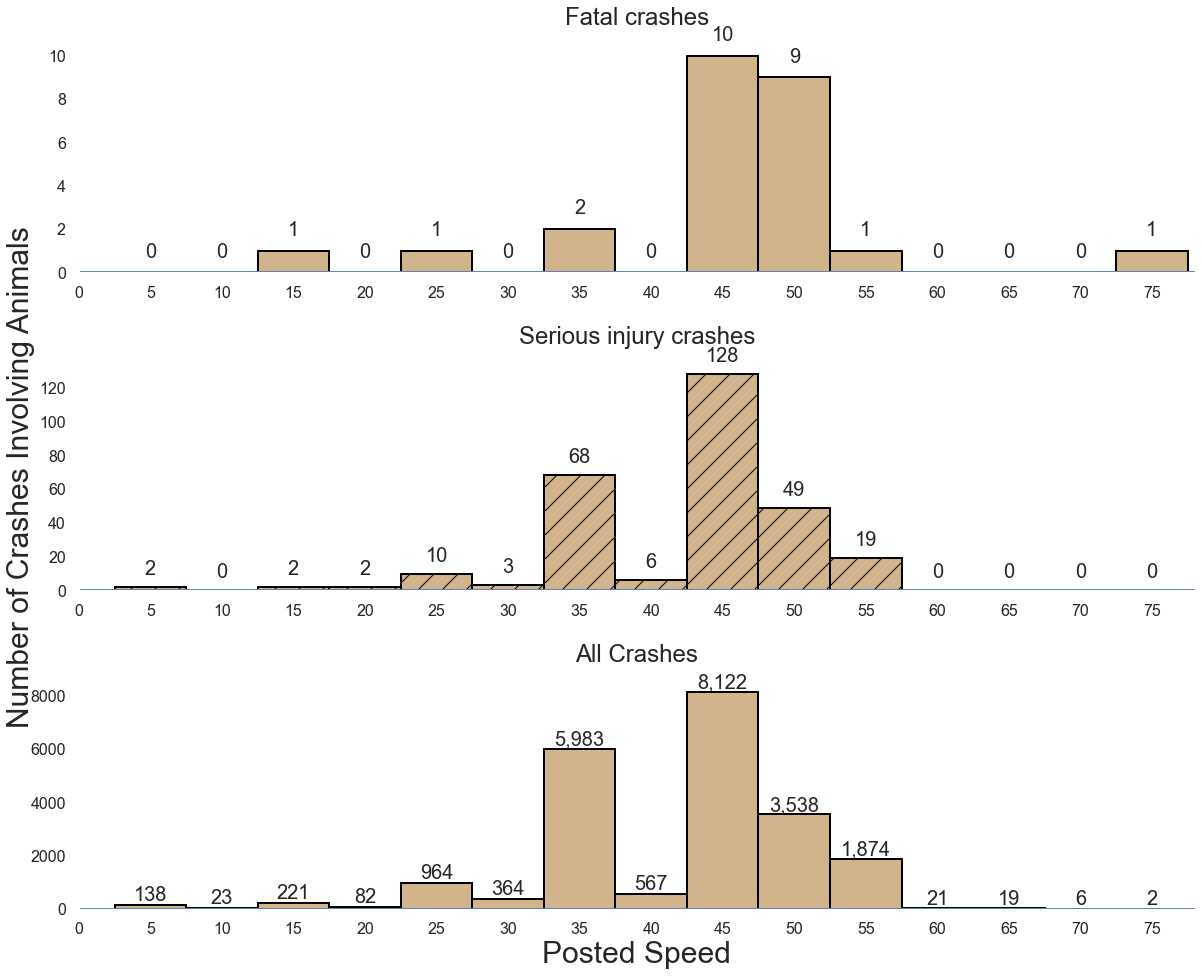

In [17]:
#graph_title = "No Commercial Vehicle Sign Locations by Physical Locations on BLRI Parkway"
axis_title = "Number of Crashes Involving VRUs"
plt.style.use('seaborn')
sns.set(rc={'axes.facecolor':'1', 'figure.facecolor':'white', 'patch.linewidth': 0.0})
fig, ax = plt.subplots(3,1,figsize=(20,15))
tick_spacing = 5


ax[0].bar(Animals_by_speed_fatals['Posted Speed'],
        Animals_by_speed_fatals['Total Crashes'],
        width = 5, color = 'tan', edgecolor = "black", linewidth=2)

ax[1].bar(Animals_by_speed_serious_injury['Posted Speed'],
        Animals_by_speed_serious_injury['Total Crashes'],
        width = 5, hatch = "/", color = 'tan', edgecolor = "black", linewidth=2)

ax[2].bar(Animals_by_speed['Posted Speed'],
        Animals_by_speed['Total Crashes'],
        width = 5, color = 'tan', edgecolor = "black", linewidth=2)


#bar_max = 1.15*max(max(VRU_by_speed['Total Crashes']), max(Animals_by_speed['Total Crashes']))

#ax.set_ylim([0, bar_max])
#ax.set_xlim([0, 58])
ax[0].set_title("Fatal crashes",fontsize= 24, pad = 20) # title of plot
ax[1].set_title("Serious injury crashes",fontsize= 24, pad = 20) # title of plot
ax[2].set_title("All Crashes",fontsize= 24, pad = 20) # title of plot

# Make some labels.
rects = ax[0].patches
labels = [f"label{i}" for i in range(len(rects))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    label = '{:,}'.format(int(height))
    ax[0].text(
        rect.get_x() + rect.get_width() / 2, height + 0.5, label, ha="center", va="bottom",fontsize=20
    )

# Make some labels.
rects = ax[1].patches
labels = [f"label{i}" for i in range(len(rects))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    label = '{:,}'.format(int(height))
    ax[1].text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",fontsize=20
    )

    # Make some labels.
rects = ax[2].patches
labels = [f"label{i}" for i in range(len(rects))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    label = '{:,}'.format(int(height))
    ax[2].text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",fontsize=20
    )

    
#ax[0].set_ylim([0, bar_max])
ax[0].set_xlim([0, 78])
ax[0].hlines(0, xmin = 0, xmax = 78, linewidth = 3)
ax[0].xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
#ax[0].set_ylabel("Number of Crashes", fontsize = 30)#ylabel
ax[0].tick_params(axis='x', which='major', labelsize=16)
ax[0].tick_params(axis='y', which='major', labelsize=16)
ax[0].tick_params(axis='both', which='minor', labelsize=8)

ax[1].set_xlim([0, 78])
ax[1].hlines(0, xmin = 0, xmax = 78, linewidth = 3)
ax[1].xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax[1].set_ylabel("Number of Crashes Involving Animals", fontsize = 30)#ylabel
ax[1].tick_params(axis='x', which='major', labelsize=16)
ax[1].tick_params(axis='y', which='major', labelsize=16)
ax[1].tick_params(axis='both', which='minor', labelsize=8)

ax[2].set_xlim([0, 78])
ax[2].hlines(0, xmin = 0, xmax = 78, linewidth = 3)
ax[2].xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax[2].set_xlabel('Posted Speed',fontsize = 30) #xlabel
#ax[2].set_ylabel("Number of Crashes", fontsize = 30)#ylabel
ax[2].tick_params(axis='x', which='major', labelsize=16)
ax[2].tick_params(axis='y', which='major', labelsize=16)
ax[2].tick_params(axis='both', which='minor', labelsize=8)



#plt.title(graph_title,fontsize=34)
# set the spacing between subplots
plt.subplots_adjust(
                    bottom=0.1, 
                    
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

plt.show()

In [18]:
df_by_speed = create_speed_table()
df_by_speed_fatals = create_speed_table(1, 'Fatality')
df_by_speed_serious_injury = create_speed_table(1, 'Incapacitating Injury')


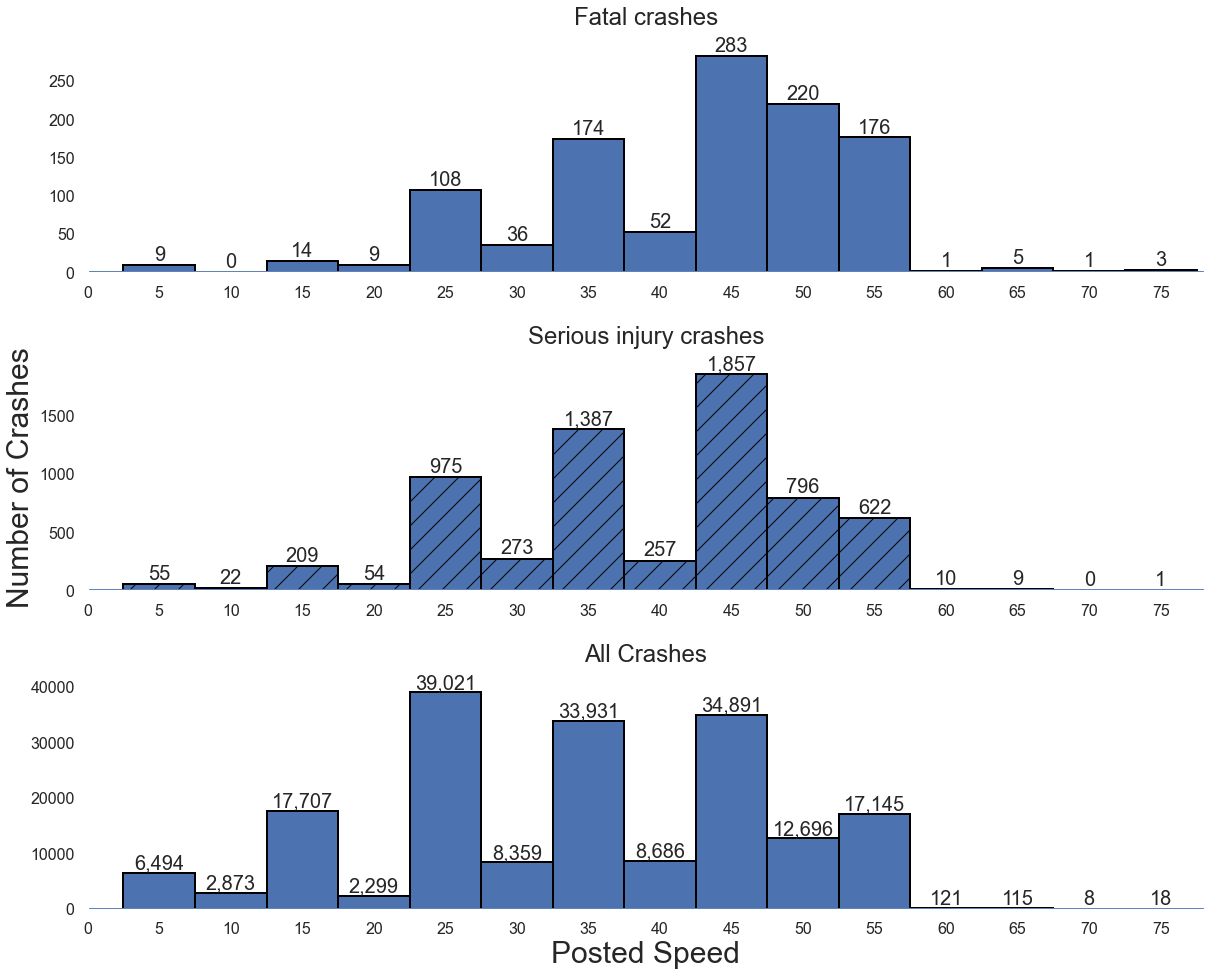

In [19]:
#graph_title = "No Commercial Vehicle Sign Locations by Physical Locations on BLRI Parkway"
axis_title = "Number of Crashes Involving VRUs"
plt.style.use('seaborn')
sns.set(rc={'axes.facecolor':'1', 'figure.facecolor':'white', 'patch.linewidth': 0.0})
fig, ax = plt.subplots(3,1,figsize=(20,15))
tick_spacing = 5


ax[0].bar(df_by_speed_fatals['Posted Speed'],
        df_by_speed_fatals['Total Crashes'],
        width = 5, edgecolor = "black", linewidth=2)

ax[1].bar(df_by_speed_serious_injury['Posted Speed'],
        df_by_speed_serious_injury['Total Crashes'],
        width = 5, hatch = "/", edgecolor = "black", linewidth=2)

ax[2].bar(df_by_speed['Posted Speed'],
        df_by_speed['Total Crashes'],
        width = 5, edgecolor = "black", linewidth=2)


#bar_max = 1.15*max(max(VRU_by_speed['Total Crashes']), max(Animals_by_speed['Total Crashes']))

#ax.set_ylim([0, bar_max])
#ax.set_xlim([0, 58])
ax[0].set_title("Fatal crashes",fontsize= 24, pad = 20) # title of plot
ax[1].set_title("Serious injury crashes",fontsize= 24, pad = 20) # title of plot
ax[2].set_title("All Crashes",fontsize= 24, pad = 20) # title of plot

# Make some labels.
rects = ax[0].patches
labels = [f"label{i}" for i in range(len(rects))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    label = '{:,}'.format(int(height))
    ax[0].text(
        rect.get_x() + rect.get_width() / 2, height + 0.5, label, ha="center", va="bottom",fontsize=20
    )

# Make some labels.
rects = ax[1].patches
labels = [f"label{i}" for i in range(len(rects))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    label = '{:,}'.format(int(height))
    ax[1].text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",fontsize=20
    )

    # Make some labels.
rects = ax[2].patches
labels = [f"label{i}" for i in range(len(rects))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    label = '{:,}'.format(int(height))
    ax[2].text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",fontsize=20
    )

    
#ax[0].set_ylim([0, bar_max])
ax[0].set_xlim([0, 78])
ax[0].hlines(0, xmin = 0, xmax = 78, linewidth = 3)
ax[0].xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
#ax[0].set_ylabel("Number of Crashes", fontsize = 30)#ylabel
ax[0].tick_params(axis='x', which='major', labelsize=16)
ax[0].tick_params(axis='y', which='major', labelsize=16)
ax[0].tick_params(axis='both', which='minor', labelsize=8)

ax[1].set_xlim([0, 78])
ax[1].hlines(0, xmin = 0, xmax = 78, linewidth = 3)
ax[1].xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax[1].set_ylabel("Number of Crashes", fontsize = 30)#ylabel
ax[1].tick_params(axis='x', which='major', labelsize=16)
ax[1].tick_params(axis='y', which='major', labelsize=16)
ax[1].tick_params(axis='both', which='minor', labelsize=8)

ax[2].set_xlim([0, 78])
ax[2].hlines(0, xmin = 0, xmax = 78, linewidth = 3)
ax[2].xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax[2].set_xlabel('Posted Speed',fontsize = 30) #xlabel
#ax[2].set_ylabel("Number of Crashes", fontsize = 30)#ylabel
ax[2].tick_params(axis='x', which='major', labelsize=16)
ax[2].tick_params(axis='y', which='major', labelsize=16)
ax[2].tick_params(axis='both', which='minor', labelsize=8)



#plt.title(graph_title,fontsize=34)
# set the spacing between subplots
plt.subplots_adjust(
                    bottom=0.1, 
                    
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

plt.show()

In [39]:
len(analysis_2022.loc[analysis_2022['LATITUDE'].isnull()==True])/len(analysis_2022.LATITUDE.isnull()==False)

0.8243082610826206

In [55]:
df_year_origin_coords =analysis_2022.loc[analysis_2022['LATITUDE'].isnull()==False]
df_year_origin_coords

,INCID_NO,NUM_OCC,5_mph,10_mph,15_mph,20_mph,25_mph,30_mph,35_mph,40_mph,...,OtherDomestic,Involving Animal,LATITUDE,LONGITUDE,Park,RGN,CRASH_DATE,CRASH_TIME,CRASH_YEAR,database
4,ABLI140610163500,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,38.912050,-76.934120,ABLI,SER,2014-06-10,1635,2014.0,CDS
348,ACAD090421120000,14.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,44.368910,-68.238560,ACAD,NER,2009-04-21,1200,2009.0,CDS
1617,ANTI150711111500,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,39.405180,-77.751841,ANTI,NCR,2015-07-11,1115,2015.0,CDS
1788,ARCH150508151000,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,38.623760,-109.596920,ARCH,IMR,2015-05-08,1510,2015.0,CDS
1791,ARCH150623170000,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,38.622790,-109.601340,ARCH,IMR,2015-06-23,1700,2015.0,CDS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206026,NP20125822,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,36.605187,-83.695478,CUGA,SER,2020-11-22,630,2020.0,IMARS
206027,PP20057279,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,38.940841,-77.133592,GWMP,NCR,2020-12-17,955,2020.0,IMARS
206028,NP20125797,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,35.671851,-83.580464,GRSM,SER,2021-03-11,1730,2021.0,IMARS
206029,NP20125951,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,41.816467,-124.093035,REDW,PWR,2021-12-20,1330,2021.0,IMARS


In [65]:
analysis_2022['ones'] = 1
df_year_origin=analysis_2022.groupby(['database', "CRASH_YEAR"]).sum()
df_year_origin=df_year_origin.reset_index()
df_year_origin = df_year_origin.loc[df_year_origin['CRASH_YEAR']<2022]
df_year_origin = df_year_origin.loc[df_year_origin['CRASH_YEAR']>1988]

df_year_origin_coords =analysis_2022.loc[analysis_2022['LATITUDE'].isnull()==False]
df_year_origin_coords = df_year_origin_coords.groupby(['database', "CRASH_YEAR"]).sum()
df_year_origin_coords=df_year_origin_coords.reset_index()
df_year_origin_coords = df_year_origin_coords.loc[df_year_origin_coords['CRASH_YEAR']<2022]
df_year_origin_coords = df_year_origin_coords.loc[df_year_origin_coords['CRASH_YEAR']>1988]

#df_year_origin=df_year_origin[['CATEGORY','# Crash']].sort_values(by='CATEGORY')
#df_type_grouped.rename(columns={'# Crash': 'number_of_crashes'}, inplace=True)

In [66]:
df_year_origin_coords

,database,CRASH_YEAR,NUM_OCC,5_mph,10_mph,15_mph,20_mph,25_mph,30_mph,35_mph,...,Bear,Antelope,SheepGoats,OtherWild,OtherDomestic,Involving Animal,LATITUDE,LONGITUDE,CRASH_TIME,ones
5,CDS,1990.0,2215.0,0.0,0.0,5.0,1.0,75.0,6.0,15.0,...,0.0,0.0,0.0,0.0,0.0,22.0,28227.353810,-55663.412835,905802,724
6,CDS,1991.0,1920.0,0.0,1.0,3.0,0.0,60.0,7.0,27.0,...,0.0,0.0,0.0,0.0,0.0,18.0,26665.821300,-52590.380662,861262,684
7,CDS,1992.0,2123.0,0.0,0.0,3.0,3.0,67.0,8.0,109.0,...,0.0,0.0,0.0,0.0,0.0,22.0,29463.193807,-58122.333074,966773,756
8,CDS,1993.0,2581.0,1.0,1.0,5.0,10.0,65.0,5.0,83.0,...,0.0,0.0,0.0,0.0,0.0,17.0,33518.040873,-66109.272463,1077534,860
9,CDS,1994.0,1844.0,3.0,1.0,10.0,7.0,51.0,3.0,51.0,...,0.0,0.0,0.0,0.0,0.0,25.0,29475.714729,-58185.972583,950388,757
10,CDS,1995.0,1871.0,3.0,6.0,7.0,12.0,46.0,2.0,61.0,...,0.0,0.0,0.0,0.0,0.0,39.0,29555.920290,-60621.792945,980017,741
11,CDS,1996.0,2096.0,5.0,6.0,11.0,5.0,46.0,1.0,84.0,...,0.0,0.0,0.0,0.0,0.0,36.0,29356.355224,-59800.594439,921200,740
12,CDS,1997.0,2355.0,1.0,7.0,4.0,6.0,32.0,1.0,82.0,...,0.0,0.0,0.0,0.0,0.0,31.0,29900.198335,-60946.379257,945778,752
13,CDS,1998.0,315.0,3.0,1.0,6.0,1.0,3.0,0.0,41.0,...,0.0,0.0,0.0,0.0,0.0,17.0,4151.454650,-9941.289300,130354,95
14,CDS,1999.0,472.0,7.0,5.0,19.0,0.0,9.0,0.0,77.0,...,0.0,0.0,0.0,0.0,0.0,27.0,6608.368439,-17262.814171,220483,161


In [70]:
cds_year.columns

Index(['database', 'CRASH_YEAR', 'NUM_OCC', '5_mph', '10_mph', '15_mph',
       '20_mph', '25_mph', '30_mph', '35_mph', '40_mph', '45_mph', '50_mph',
       '55_mph', '60_mph', '65_mph', '70_mph', '75_mph', 'no_posted_speed',
       'Crosswalk', 'Outside a Crosswalk', 'No Injury', 'Possible Injury',
       'Non-incapacitating Injury', 'Incapacitating Injury', 'Fatality',
       'Unknown Injury', 'Num_Fatalities', 'Num_Injuries', 'Injury or Fatal',
       'Pedestrian', 'Bicycle', 'Pedacycle', 'VRU', 'HorseLlama', 'Cow',
       'Deer', 'Elk', 'Moose', 'Buffalo', 'Bear', 'Antelope', 'SheepGoats',
       'OtherWild', 'OtherDomestic', 'Involving Animal', 'LATITUDE',
       'LONGITUDE', 'CRASH_TIME', 'ones'],
      dtype='object')

In [69]:
cds_year = df_year_origin.loc[df_year_origin['database']=='CDS']
imars_year = df_year_origin.loc[df_year_origin['database']=='IMARS']
cds_year_coords = df_year_origin_coords.loc[df_year_origin_coords['database']=='CDS']
imars_year_coords = df_year_origin_coords.loc[df_year_origin_coords['database']=='IMARS']


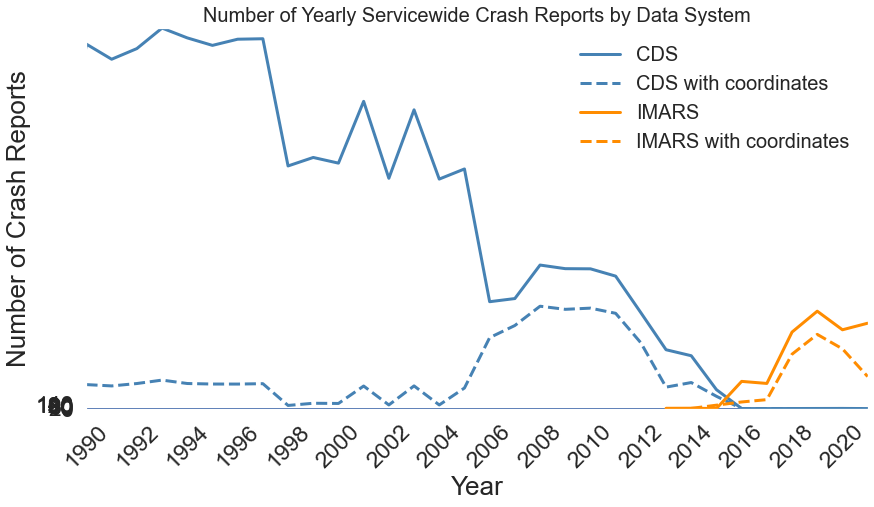

In [73]:
import matplotlib.ticker as ticker
plt.style.use('seaborn')
tick_spacing = 2 
sns.set(rc={'axes.facecolor':'1', 'figure.facecolor':'white', 'patch.linewidth': 0.0})
fig,ax = plt.subplots(1,1, figsize=(14, 7))

ax.set_title('Number of Yearly Servicewide Crash Reports by Data System', fontsize=20)
ax.plot(cds_year["CRASH_YEAR"], cds_year['ones'], label = 'CDS', linewidth = 3, 
       color = "steelblue")
ax.plot(cds_year_coords["CRASH_YEAR"], cds_year_coords['ones'], label = 'CDS with coordinates', linewidth = 3, 
       color = "steelblue", linestyle='dashed')
ax.plot(imars_year["CRASH_YEAR"], imars_year['ones'], label = 'IMARS', linewidth = 3, 
       color = "darkorange")
ax.plot(imars_year_coords["CRASH_YEAR"], imars_year_coords['ones'], label = 'IMARS with coordinates', 
        linewidth = 3, 
       color = "darkorange", linestyle = 'dashed')

legend = plt.legend(frameon = 2,fontsize=20)
frame = legend.get_frame()
frame.set_color('white')
frame.set_facecolor('white')
frame.set_edgecolor('black')
plt.xlim([1990,2021])
plt.ylim([0,max(cds_year['ones'])])
ax.set_yticks([0,20,40,60, 80, 100, 120, 140])
ax.grid('off')
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.tick_params(axis='x', which='major', labelsize=23, rotation=45)
ax.tick_params(axis='y', which='major', labelsize=23)
ax.tick_params(axis='both', which='minor', labelsize=23)
ax.hlines(0, xmin = 1990, xmax = 2021, linewidth = 3)
ax.set_xlabel("Year", fontsize=26)
ax.set_ylabel("Number of Crash Reports", fontsize=26)

plt.show()

In [62]:
max(cds_year['Incapacitating Injury'])

676.0

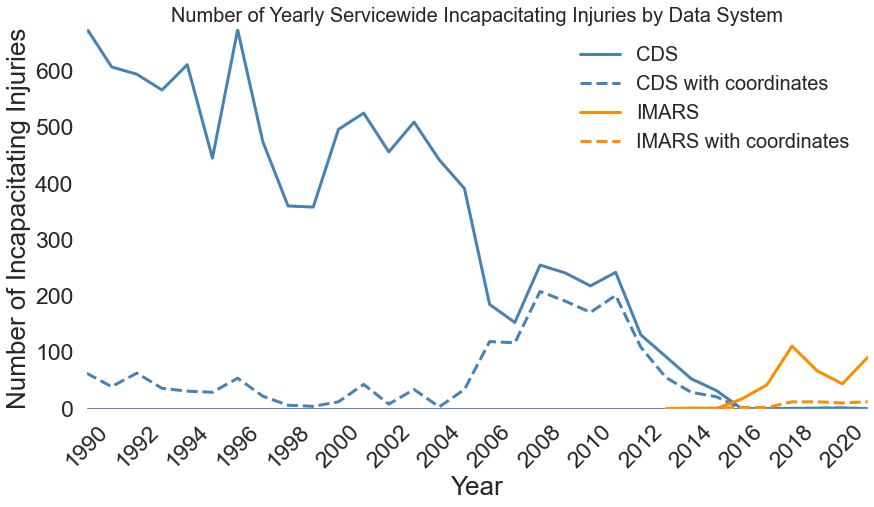

In [74]:
import matplotlib.ticker as ticker
plt.style.use('seaborn')
tick_spacing = 2 
sns.set(rc={'axes.facecolor':'1', 'figure.facecolor':'white', 'patch.linewidth': 0.0})
fig,ax = plt.subplots(1,1, figsize=(14, 7))

ax.set_title('Number of Yearly Servicewide Incapacitating Injuries by Data System', fontsize=20)
ax.plot(cds_year["CRASH_YEAR"], cds_year['Incapacitating Injury'], label = 'CDS', linewidth = 3, 
       color = "steelblue")
ax.plot(cds_year_coords["CRASH_YEAR"], cds_year_coords['Incapacitating Injury'], label = 'CDS with coordinates', linewidth = 3, 
       color = "steelblue", linestyle='dashed')
ax.plot(imars_year["CRASH_YEAR"], imars_year['Incapacitating Injury'], label = 'IMARS', linewidth = 3, 
       color = "darkorange")
ax.plot(imars_year_coords["CRASH_YEAR"], imars_year_coords['Fatality'], label = 'IMARS with coordinates', 
        linewidth = 3, 
       color = "darkorange", linestyle = 'dashed')

legend = plt.legend(frameon = 2,fontsize=20)
frame = legend.get_frame()
frame.set_color('white')
frame.set_facecolor('white')
frame.set_edgecolor('black')
plt.xlim([1990,2021])
plt.ylim([0,max(cds_year['Incapacitating Injury'])])
ax.grid('off')
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.tick_params(axis='x', which='major', labelsize=23, rotation=45)
ax.tick_params(axis='y', which='major', labelsize=23)
ax.tick_params(axis='both', which='minor', labelsize=23)
ax.hlines(0, xmin = 1990, xmax = 2021, linewidth = 3)
ax.set_xlabel("Year", fontsize=26)
ax.set_ylabel("Number of Incapacitating Injuries", fontsize=26)

plt.show()

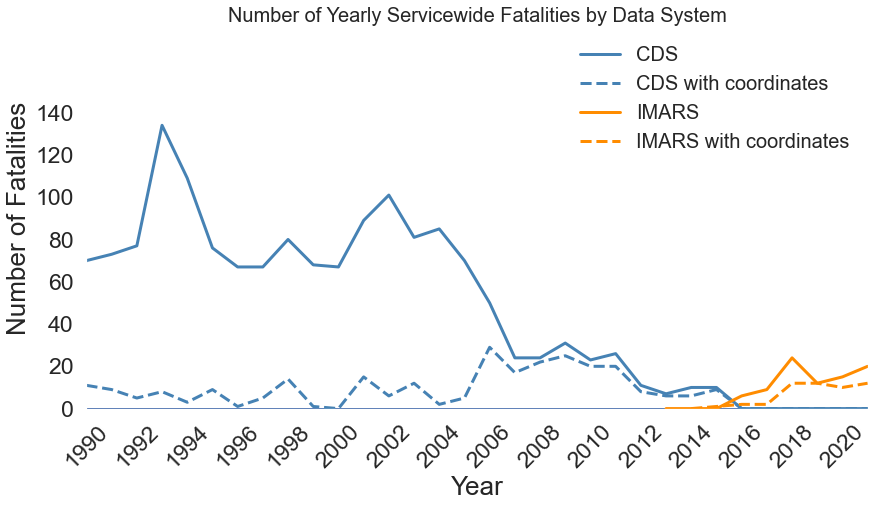

In [75]:
import matplotlib.ticker as ticker
plt.style.use('seaborn')
tick_spacing = 2 
sns.set(rc={'axes.facecolor':'1', 'figure.facecolor':'white', 'patch.linewidth': 0.0})
fig,ax = plt.subplots(1,1, figsize=(14, 7))

ax.set_title('Number of Yearly Servicewide Fatalities by Data System', fontsize=20)
ax.plot(cds_year["CRASH_YEAR"], cds_year['Fatality'], label = 'CDS', linewidth = 3, 
       color = "steelblue")
ax.plot(cds_year_coords["CRASH_YEAR"], cds_year_coords['Fatality'], label = 'CDS with coordinates', linewidth = 3, 
       color = "steelblue", linestyle='dashed')
ax.plot(imars_year["CRASH_YEAR"], imars_year['Fatality'], label = 'IMARS', linewidth = 3, 
       color = "darkorange")
ax.plot(imars_year_coords["CRASH_YEAR"], imars_year_coords['Fatality'], label = 'IMARS with coordinates', 
        linewidth = 3, 
       color = "darkorange", linestyle = 'dashed')

legend = plt.legend(frameon = 2,fontsize=20)
frame = legend.get_frame()
frame.set_color('white')
frame.set_facecolor('white')
frame.set_edgecolor('black')
plt.xlim([1990,2021])
plt.ylim([0,180])
ax.set_yticks([0,20,40,60, 80, 100, 120, 140])
ax.grid('off')
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.tick_params(axis='x', which='major', labelsize=23, rotation=45)
ax.tick_params(axis='y', which='major', labelsize=23)
ax.tick_params(axis='both', which='minor', labelsize=23)
ax.hlines(0, xmin = 1990, xmax = 2021, linewidth = 3)
ax.set_xlabel("Year", fontsize=26)
ax.set_ylabel("Number of Fatalities", fontsize=26)

plt.show()

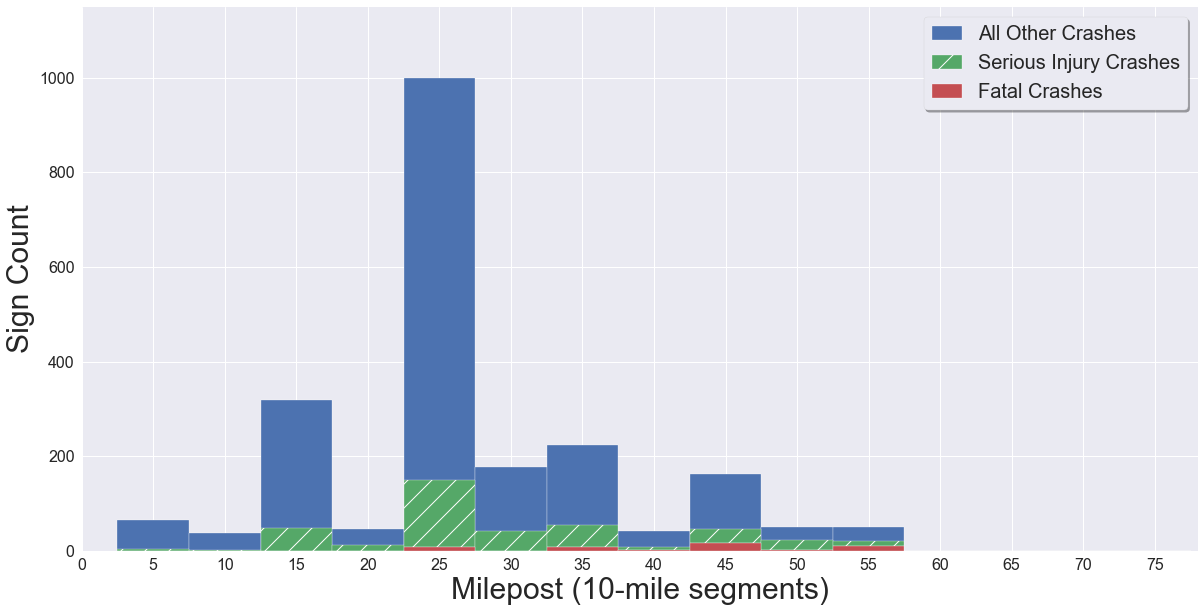

In [216]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
graph_title = "No Commercial Vehicle Sign Locations by Physical Locations on BLRI Parkway"
axis_title = "Number of Crashes Involving VRUs"
plt.style.use('seaborn')
fig, ax = plt.subplots(1,1,figsize=(20,10))
tick_spacing = 5



plt.bar(VRU_by_speed['Posted Speed'],
        VRU_by_speed['Total Crashes'],
        width = 5, label = 'All Other Crashes')
plt.bar(VRU_by_speed_serious_injury['Posted Speed'],
        VRU_by_speed_serious_injury['Total Crashes'],
        width = 5, hatch = "/", bottom =  VRU_by_speed_fatals['Total Crashes'], label = 'Serious Injury Crashes')
plt.bar(VRU_by_speed_fatals['Posted Speed'],
        VRU_by_speed_fatals['Total Crashes'],
        width = 5, label = 'Fatal Crashes')



bar_max = 1.15*max(VRU_by_speed['Total Crashes'])


#make graph pretty
ax.set_ylim([0, bar_max])
ax.set_xlim([0, 78])
#ax.set_title(graph_title,fontsize= 35, pad = 20) # title of plot

ax.set_xlabel('Posted Speed',fontsize = 30) #xlabel
ax.set_ylabel(axis_title, fontsize = 30)#ylabel
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.tick_params(axis='x', which='major', labelsize=16)
ax.tick_params(axis='y', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=8)
ax.grid('off')
ax.legend(fontsize = 20, frameon=True,fancybox = True,shadow=True, handlelength=1.5,framealpha=1, )
plt.show()

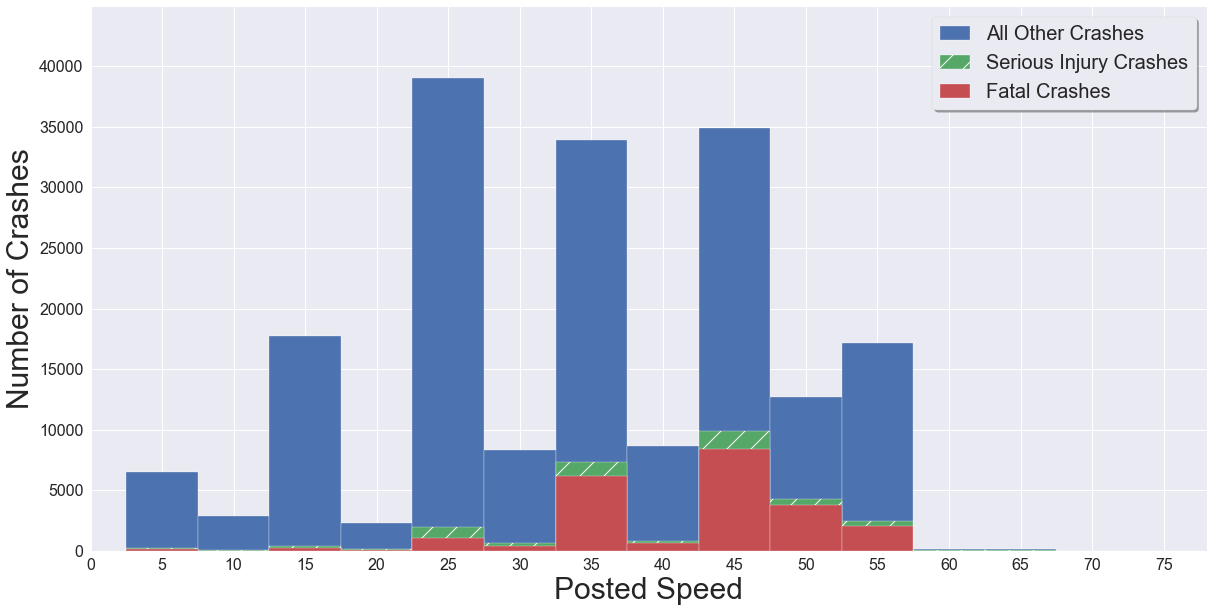

In [232]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
axis_title = "Number of Crashes"
plt.style.use('seaborn')
fig, ax = plt.subplots(1,1,figsize=(20,10))
tick_spacing = 5



plt.bar(df_by_speed['Posted Speed'],
        df_by_speed['Total Crashes'],
        width = 5, label = 'All Other Crashes')
plt.bar(df_by_speed_serious_injury['Posted Speed'],
        df_by_speed_serious_injury['Total Crashes'],
        width = 5, hatch = "/", bottom =  VRU_by_speed_fatals['Total Crashes'], label = 'Serious Injury Crashes')
plt.bar(df_by_speed_fatals['Posted Speed'],
        df_by_speed_fatals['Total Crashes'],
        width = 5, label = 'Fatal Crashes')



bar_max = 1.15*max(df_by_speed['Total Crashes'])


#make graph pretty
ax.set_ylim([0, bar_max])
ax.set_xlim([0, 78])
#ax.set_title(graph_title,fontsize= 35, pad = 20) # title of plot

ax.set_xlabel('Posted Speed',fontsize = 30) #xlabel
ax.set_ylabel(axis_title, fontsize = 30)#ylabel
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.tick_params(axis='x', which='major', labelsize=16)
ax.tick_params(axis='y', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=8)
ax.grid('off')
ax.legend(fontsize = 20, frameon=True,fancybox = True,shadow=True, handlelength=1.5,framealpha=1, )
plt.show()

In [15]:
#First need to create a dataframe where collision w animals equals 1 
involveanimals = analysis_2022[analysis_2022['Involving Animal'] == 1]
involveanimals.head()

,INCID_NO,NUM_OCC,5_mph,10_mph,15_mph,20_mph,25_mph,30_mph,35_mph,40_mph,...,OtherDomestic,Involving Animal,LATITUDE,LONGITUDE,Park,RGN,CRASH_DATE,CRASH_TIME,CRASH_YEAR,database
50,ACAD0000000807,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,NaN,NaN,ACAD,NER,2000-09-19,900,2000.0,CDS
106,ACAD000919090000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,NaN,NaN,ACAD,NER,2000-09-19,900,2000.0,CDS
145,ACAD0100000459,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,NaN,NaN,ACAD,NER,2001-07-31,2110,2001.0,CDS
166,ACAD0100000775,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,NaN,NaN,ACAD,NER,2001-08-25,1630,2001.0,CDS
169,ACAD0100000994,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,NaN,NaN,ACAD,NER,2001-09-23,230,2001.0,CDS


In [11]:
#Obtaining number of crashes where collision w animals is 1 or True 
involveanimal_total = involveanimals.shape[0]


In [12]:
print(involveanimal_total)

22743


In [13]:
#Obtaining total number of crashes in the entire dataset 
total_crashes = analysis_2022.shape[0]
print(total_crashes)

206111


In [35]:
#Computing % of Total Crashes Involving Animal
involveanimal_percentage = round(involveanimal_total/total_crashes,3)*100
involveanimal_percentage

11.0

#### Computing No. of Injuries Among Crashes Involving Animals

In [25]:
numinjuries_involveanimal = involveanimals['Num_Injuries'].sum()
print(numinjuries_involveanimal)

2856.0


#### Computing No. Fatalities Among Crashes Involving Animals 


In [27]:
numfatalities_involveanimal = involveanimals['Num_Fatalities'].sum()
print(numfatalities_involveanimal)


28.0


#### Number of Serious Injuries Among Crahses Involving Animals 

In [29]:
seriousinjuries_involveanimals = involveanimals['Incapacitating Injury'].sum()
print(seriousinjuries_involveanimals)

402.0


### Crashes Involving VRUs 

#### Computing % of Crashes Involving VRUs

In [30]:
VRU = analysis_2022[analysis_2022['VRU'] == 1]
print(VRU)

                INCID_NO  NUM_OCC  5_mph  10_mph  15_mph  20_mph  25_mph  \
2       ABLI091117170900      2.0    0.0     0.0     0.0     0.0     1.0   
133       ACAD0100000265      4.0    0.0     0.0     0.0     0.0     0.0   
195     ACAD010716103000      4.0    0.0     0.0     0.0     0.0     0.0   
348     ACAD090421120000     14.0    0.0     0.0     0.0     0.0     0.0   
580       ACAD8900006028      4.0    0.0     0.0     0.0     0.0     1.0   
...                  ...      ...    ...     ...     ...     ...     ...   
205725        NP20101607      1.0    0.0     0.0     0.0     0.0     0.0   
205730        NP20102165      2.0    0.0     0.0     1.0     0.0     0.0   
205745        NP20102524      1.0    0.0     0.0     0.0     0.0     0.0   
205968        PP20056040      3.0    0.0     0.0     0.0     0.0     0.0   
206027        PP20057279      2.0    0.0     0.0     0.0     0.0     1.0   

        30_mph  35_mph  40_mph  ...  OtherDomestic  Involving Animal  \
2          0.0 

In [31]:
#Obtaining number of crashes involving VRU is 1 or True 
VRU_total = VRU.shape[0]
print(VRU_total)

2815


In [32]:
#Calculating total % of crashes involving VRU
VRU_percentage = round(VRU_total/total_crashes, 5)*100
print(VRU_percentage)

1.366


#### Computing No. of Injuries Involving VRU

In [33]:
numinjuries_VRU = VRU['Num_Injuries'].sum()
print(numinjuries_VRU)

1282.0


#### Computing No. of Fatalities Among Crashes Involving VRU

In [34]:
numfatalities_VRU = VRU['Num_Fatalities'].sum()
print(numfatalities_VRU)

26.0


In [39]:
seriousinjuries_VRU = VRU['Incapacitating Injury'].sum()
print(seriousinjuries_VRU)

581.0


### Table of National Trends

In [44]:
nationaldata= {'Collision Type': ['Crashes Involving VRUs','Crashes Involving Animals'], 'Percentage of Total Crashes': [VRU_percentage,involveanimal_percentage], 'Number of Injuries':[numinjuries_VRU, numinjuries_involveanimal], 'Number of Serious Injuries':[seriousinjuries_VRU, seriousinjuries_involveanimals], 'Number of Fatalities':[numfatalities_VRU,numfatalities_involveanimal]}

In [45]:
df5 = pd.DataFrame(nationaldata)

In [46]:
print(df5)

              Collision Type  Percentage of Total Crashes  Number of Injuries  \
0     Crashes Involving VRUs                        1.366              1282.0   
1  Crashes Involving Animals                       11.000              2856.0   

   Number of Serious Injuries  Number of Fatalities  
0                       581.0                  26.0  
1                       402.0                  28.0  


In [47]:
#Calculate Grant Total to Table 
df5[['Percentage of Total Crashes', 'Number of Injuries', 'Number of Serious Injuries', 'Number of Fatalities']].sum()

Percentage of Total Crashes      12.366
Number of Injuries             4138.000
Number of Serious Injuries      983.000
Number of Fatalities             54.000
dtype: float64

In [48]:
#Add Grand Totals to Table 
df5.append(df5[['Percentage of Total Crashes', 'Number of Injuries', 'Number of Serious Injuries', 'Number of Fatalities']].sum().rename('Servicewide Total')).fillna('')


C:\Users\Smitha.Mahesh\AppData\Local\Temp\ipykernel_19832\3692146198.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df5.append(df5[['Percentage of Total Crashes', 'Number of Injuries', 'Number of Serious Injuries', 'Number of Fatalities']].sum().rename('Servicewide Total')).fillna('')


,Collision Type,Percentage of Total Crashes,Number of Injuries,Number of Serious Injuries,Number of Fatalities
0,Crashes Involving VRUs,1.366,1282.0,581.0,26.0
1,Crashes Involving Animals,11.000,2856.0,402.0,28.0
Servicewide Total,,12.366,4138.0,983.0,54.0


In [8]:
#% of crashes involving VRUs that resulted in a fatality OR injury  
injuryorfatality_VRU = VRU['Injury or Fatal'].sum()
print(injuryorfatality_VRU)
print("The percentage of crashes involving VRUs that resulted in a fatality or injury is", injuryorfatality_VRU)

1335.0
The percentage of crashes involving VRUs that resulted in a fatality or injury is 1335.0


In [9]:
#The following were excluded from the graph because there are no crashes found at the posted speeds 
VRU_60 = VRU['60_mph'].sum() 
print(VRU_60)
VRU_65 = VRU['65_mph'].sum()
print(VRU_65)
VRU_70 = VRU['70_mph'].sum() 
print(VRU_70)
VRU_75 = VRU['75_mph'].sum()
print(VRU_75)

0.0
0.0
0.0
0.0


Text(0, 0.5, 'Number of Crashes')

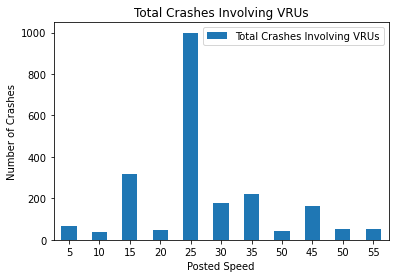

In [16]:
fatality_VRU = VRU[VRU['Fatality'] == 1]
print(fatality_VRU)

                INCID_NO  NUM_OCC  5_mph  10_mph  15_mph  20_mph  25_mph  \
3462    BAWA030822224400      1.0    0.0     0.0     0.0     0.0     0.0   
3513    BAWA030919222300      0.0    0.0     0.0     0.0     0.0     0.0   
3627    BAWA031104232100      1.0    0.0     0.0     0.0     0.0     0.0   
4561    BAWA060415060700      1.0    0.0     0.0     0.0     0.0     0.0   
5674    BAWA071229024700      3.0    0.0     0.0     0.0     0.0     0.0   
5811    BAWA080419212100      0.0    0.0     0.0     0.0     0.0     0.0   
6420    BAWA090210193900      2.0    0.0     0.0     0.0     0.0     0.0   
6668    BAWA090804211100      5.0    0.0     0.0     0.0     0.0     0.0   
14387   BAWA941226181600      1.0    0.0     0.0     0.0     0.0     0.0   
14400   BAWA950103173100      1.0    0.0     0.0     0.0     0.0     0.0   
27294     BWMP0200025844      1.0    0.0     0.0     0.0     0.0     0.0   
27318     BWMP0200026932      0.0    0.0     0.0     0.0     0.0     0.0   
27972     BW

In [23]:
VRUfatal_5 = fatality_VRU['5_mph'].sum()
VRUfatal_10 = fatality_VRU['10_mph'].sum() 
VRUfatal_15 = fatality_VRU['15_mph'].sum() 
VRUfatal_20 = fatality_VRU['20_mph'].sum() 
VRUfatal_25 = fatality_VRU['25_mph'].sum() 
VRUfatal_30 = fatality_VRU['30_mph'].sum() 
VRUfatal_35 = fatality_VRU['35_mph'].sum() 
VRUfatal_40 = fatality_VRU['40_mph'].sum() 
VRUfatal_45 = fatality_VRU['45_mph'].sum()
VRUfatal_50 = fatality_VRU['50_mph'].sum()
VRUfatal_55 = fatality_VRU['55_mph'].sum()

In [26]:
VRU_fatal_postedspeed= {'Posted Speed': ['5 mph', '10 mph', '15 mph', '20 mph', '25 mph', '30 mph', '35 mph', '40 mph', '45 mph', '50 mph', '55 mph'], 'Number of Fatalities':[VRUfatal_5, VRUfatal_10, VRUfatal_15, VRUfatal_20, VRUfatal_25, VRUfatal_30, VRUfatal_35, VRUfatal_40, VRUfatal_45, VRUfatal_50, VRUfatal_55]}

In [27]:
df6 = pd.DataFrame(VRU_fatal_postedspeed)
print(df6)

   Posted Speed  Number of Fatalities
0         5 mph                   0.0
1        10 mph                   0.0
2        15 mph                   0.0
3        20 mph                   0.0
4        25 mph                   7.0
5        30 mph                   0.0
6        35 mph                   7.0
7        40 mph                   2.0
8        45 mph                  15.0
9        50 mph                   2.0
10       55 mph                   9.0


In [16]:
# No. pedestrian fatalities and posted speed
#Repeated same process as done for VRU. First construct dataframe that pulls all crashes related to Pedestrian 
pedestrian = analysis_2022[analysis_2022['Pedestrian'] == 1]

#Within that dataframe, construct a dataframe where pedestrian-related crashes had fatalities 
fatalped = pedestrian[pedestrian['Fatality'] == 1]

#Now define variables to capture pedestrian fatalities by posted speed
pedfatal_5 = fatalped['5_mph'].sum()
pedfatal_10 = fatalped['10_mph'].sum() 
pedfatal_15 = fatalped['15_mph'].sum() 
pedfatal_20 = fatalped['20_mph'].sum() 
pedfatal_25 = fatalped['25_mph'].sum() 
pedfatal_30 = fatalped['30_mph'].sum() 
pedfatal_35 = fatalped['35_mph'].sum() 
pedfatal_40 = fatalped['40_mph'].sum() 
pedfatal_45 = fatalped['45_mph'].sum()
pedfatal_50 = fatalped['50_mph'].sum()
pedfatal_55 = fatalped['55_mph'].sum()
pedfatal_60 = fatalped['60_mph'].sum()
pedfatal_65 = fatalped['65_mph'].sum()
pedfatal_70 = fatalped['70_mph'].sum() 

#Create a table that lists number of pedestrian fatalities by posted speed 
pedfatal_postedspeed= {'Posted Speed': ['5 mph', '10 mph', '15 mph', '20 mph', '25 mph', '30 mph', '35 mph', '40 mph', '45 mph', '50 mph', '55 mph', '60 mph', '65 mph', '70 mph'], 'Number of Fatalities':[pedfatal_5, pedfatal_10, pedfatal_15, pedfatal_20, pedfatal_25, pedfatal_30, pedfatal_35, pedfatal_40, pedfatal_45, pedfatal_50, pedfatal_55, pedfatal_60, pedfatal_65, pedfatal_70]}
df7 = pd.DataFrame(pedfatal_postedspeed)
print(df7)

   Posted Speed  Number of Fatalities
0         5 mph                   0.0
1        10 mph                   0.0
2        15 mph                   0.0
3        20 mph                   0.0
4        25 mph                   7.0
5        30 mph                   0.0
6        35 mph                   6.0
7        40 mph                   2.0
8        45 mph                  13.0
9        50 mph                   1.0
10       55 mph                   9.0
11       60 mph                   0.0
12       65 mph                   0.0
13       70 mph                   0.0


In [18]:
# No. of cyclist fatalities by posted speed
#Repeated same process as done for VRU. First construct dataframe that pulls all crashes related to cyclists 
cyclists = analysis_2022[analysis_2022['Bicycle'] == 1]

#Within that dataframe, construct a dataframe where cyclist-related crashes had fatalities 
fatalcyc = cyclists[cyclists['Fatality'] == 1]

#Now define variables to capture pedestrian fatalities by posted speed
cycfatal_5 = fatalcyc['5_mph'].sum()
cycfatal_10 = fatalcyc['10_mph'].sum() 
cycfatal_15 = fatalcyc['15_mph'].sum() 
cycfatal_20 = fatalcyc['20_mph'].sum() 
cycfatal_25 = fatalcyc['25_mph'].sum() 
cycfatal_30 = fatalcyc['30_mph'].sum() 
cycfatal_35 = fatalcyc['35_mph'].sum() 
cycfatal_40 = fatalcyc['40_mph'].sum() 
cycfatal_45 = fatalcyc['45_mph'].sum()
cycfatal_50 = fatalcyc['50_mph'].sum()
cycfatal_55 = fatalcyc['55_mph'].sum()
cycfatal_60 = fatalcyc['60_mph'].sum()
cycfatal_65 = fatalcyc['65_mph'].sum()
cycfatal_70 = fatalcyc['70_mph'].sum() 

#Create a table that lists number of cyclist fatalities by posted speed 
cycfatal_postedspeed= {'Posted Speed': ['5 mph', '10 mph', '15 mph', '20 mph', '25 mph', '30 mph', '35 mph', '40 mph', '45 mph', '50 mph', '55 mph', '60 mph', '65 mph', '70 mph'], 'Number of Fatalities':[cycfatal_5, cycfatal_10, cycfatal_15, cycfatal_20, cycfatal_25, cycfatal_30, cycfatal_35, cycfatal_40, cycfatal_45, cycfatal_50, pedfatal_55, cycfatal_60, cycfatal_65, cycfatal_70]}
df8 = pd.DataFrame(cycfatal_postedspeed)
print(df8)

   Posted Speed  Number of Fatalities
0         5 mph                   0.0
1        10 mph                   0.0
2        15 mph                   0.0
3        20 mph                   0.0
4        25 mph                   0.0
5        30 mph                   0.0
6        35 mph                   1.0
7        40 mph                   0.0
8        45 mph                   2.0
9        50 mph                   1.0
10       55 mph                   9.0
11       60 mph                   0.0
12       65 mph                   0.0
13       70 mph                   0.0


Text(0, 0.5, 'Number of Fatalities')

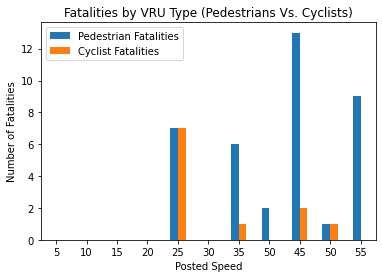

In [28]:
#Pie chart/bar graph of fatalities by VRU type (peds vs. cyclists)
postedspeed_index = [5,10,15,20,25,30,35,50,45,50,55]
df = pd.DataFrame({'Pedestrian Fatalities':[pedfatal_5,pedfatal_10,pedfatal_15,pedfatal_20,pedfatal_25,pedfatal_30,pedfatal_35,pedfatal_40,pedfatal_45,pedfatal_50,pedfatal_55], 'Cyclist Fatalities':[cycfatal_5,cycfatal_10,cycfatal_15,cycfatal_20,pedfatal_25,cycfatal_30,cycfatal_35,cycfatal_40,cycfatal_45,cycfatal_50,cycfatal_55]}, index = postedspeed_index)
ax = df.plot.bar(rot=0)

plt.title('Fatalities by VRU Type (Pedestrians Vs. Cyclists)')
plt.xlabel('Posted Speed')
plt.ylabel('Number of Fatalities')

#### See Question in One Note for the following code re. "Injury and Fatality" or "Injury or Fatal"

In [35]:
#Bar graph of VRU fatalities AND injuries combined sorted by posted speed 
injuryandfatality_VRU = VRU[VRU['Injury or Fatal'] == 1]
print(injuryandfatality_VRU)

                INCID_NO  NUM_OCC  5_mph  10_mph  15_mph  20_mph  25_mph  \
348     ACAD090421120000     14.0    0.0     0.0     0.0     0.0     0.0   
580       ACAD8900006028      4.0    0.0     0.0     0.0     0.0     1.0   
1360      ACAD9900000944      0.0    0.0     0.0     0.0     0.0     0.0   
1416    ACAD990930100000      0.0    0.0     0.0     0.0     0.0     0.0   
1987      ASIS0100000341      2.0    0.0     0.0     0.0     0.0     0.0   
...                  ...      ...    ...     ...     ...     ...     ...   
205402        NP20077087      3.0    0.0     0.0     0.0     0.0     0.0   
205467        NP20082987      2.0    0.0     0.0     0.0     0.0     0.0   
205725        NP20101607      1.0    0.0     0.0     0.0     0.0     0.0   
205730        NP20102165      2.0    0.0     0.0     1.0     0.0     0.0   
205968        PP20056040      3.0    0.0     0.0     0.0     0.0     0.0   

        30_mph  35_mph  40_mph  ...  OtherDomestic  Involving Animal  \
348        0.0 

Text(0, 0.5, 'Total Number of Crashes')

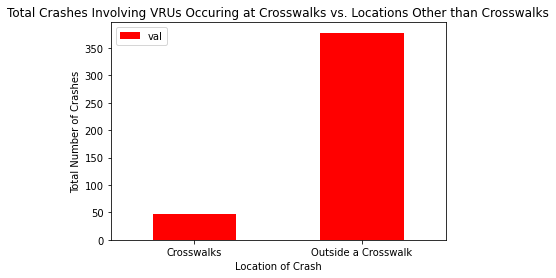

In [12]:
#Bar graph of total crashes involving VRUs occurring at crosswalks vs. locations other than crosswalks

#First need to capture crashes involving VRUs  
VRU = analysis_2022[analysis_2022['VRU'] == 1]

#Then capture crashes involving VRUs occuring at crosswalks 
VRUcross = VRU[VRU['Crosswalk'] == 1]

#Compute total crashes involving VRUs occuring at crosswalks 
VRUcrosstotal = VRUcross.shape[0]

#Next capture crashes involving VRUs occuring at locations other than crosswalks 
VRUother = VRU[VRU['Outside a Crosswalk'] == 1]

#Compute total crashes involving VRUs occuring at locations other than crosswalks 
VRUothertotal = VRUother.shape[0] 

#Construct bar graph 

#df = pd.DataFrame({'Crashes Occuring at Crosswalks':[VRUcrosstotal], 'Crashes Outside a Crosswalk':[VRUothertotal]})
df = pd.DataFrame({'location':['Crosswalks', 'Outside a Crosswalk'], 'val':[VRUcrosstotal, VRUothertotal]})
ax = df.plot.bar(x='location', y='val',color ='red', rot=0)
plt.title('Total Crashes Involving VRUs Occuring at Crosswalks vs. Locations Other than Crosswalks')
plt.xlabel('Location of Crash')
plt.ylabel('Total Number of Crashes')

Text(0, 0.5, 'Number of Crashes')

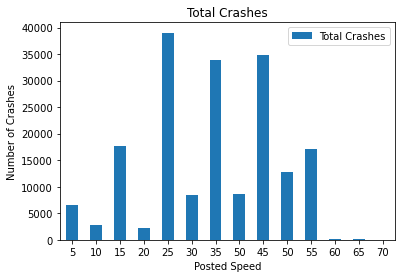

In [14]:
#Figure of all crashes by posted speed 
total_5 = analysis_2022['5_mph'].sum()
total_10 = analysis_2022['10_mph'].sum() 
total_15 = analysis_2022['15_mph'].sum()
total_20 = analysis_2022['20_mph'].sum() 
total_25 = analysis_2022['25_mph'].sum() 
total_30 = analysis_2022['30_mph'].sum()
total_35 = analysis_2022['35_mph'].sum()
total_40 = analysis_2022['40_mph'].sum()
total_45 = analysis_2022['45_mph'].sum() 
total_50 = analysis_2022['50_mph'].sum()
total_55 = analysis_2022['55_mph'].sum()
total_60 = analysis_2022['60_mph'].sum() 
total_65 = analysis_2022['65_mph'].sum() 
total_70 = analysis_2022['70_mph'].sum()
df = pd.DataFrame({'Posted Speed':[5,10,15,20,25,30,35,50,45,50,55,60,65,70], 'Total Crashes':[total_5,total_10,total_15,total_20,total_25,total_30,total_35,total_40,total_45,total_50,total_55,total_60,total_65,total_70]})
ax = df.plot.bar(x='Posted Speed', y='Total Crashes', rot=0)

plt.title('Total Crashes')
plt.xlabel('Posted Speed')
plt.ylabel('Number of Crashes')

Text(0, 0.5, 'Number of Crashes')

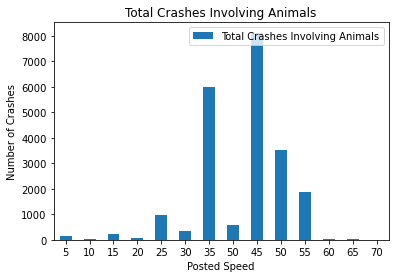

In [14]:
#Figure of all crashes involving animals by posted speed 
involveanimals = analysis_2022[analysis_2022['Involving Animal'] == 1]
animal_5 = involveanimals['5_mph'].sum()
animal_10 = involveanimals['10_mph'].sum() 
animal_15 = involveanimals['15_mph'].sum()
animal_20 = involveanimals['20_mph'].sum()
animal_25 = involveanimals['25_mph'].sum() 
animal_30 = involveanimals['30_mph'].sum()
animal_35 = involveanimals['35_mph'].sum() 
animal_40 = involveanimals['40_mph'].sum() 
animal_45 = involveanimals['45_mph'].sum() 
animal_50 = involveanimals['50_mph'].sum() 
animal_55 = involveanimals['55_mph'].sum() 
animal_60 = involveanimals['60_mph'].sum() 
animal_65 = involveanimals['65_mph'].sum() 
animal_70 = involveanimals['70_mph'].sum() 

df = pd.DataFrame({'Posted Speed':[5,10,15,20,25,30,35,50,45,50,55,60,65,70], 'Total Crashes Involving Animals':[animal_5,animal_10,animal_15,animal_20,animal_25,animal_30,animal_35, animal_40,animal_45,animal_50,animal_55, animal_60,animal_65,animal_70]})
ax = df.plot.bar(x='Posted Speed', y='Total Crashes Involving Animals', rot=0)

plt.title('Total Crashes Involving Animals')
plt.xlabel('Posted Speed')
plt.ylabel('Number of Crashes')

Text(0, 0.5, 'Number of Crashes')

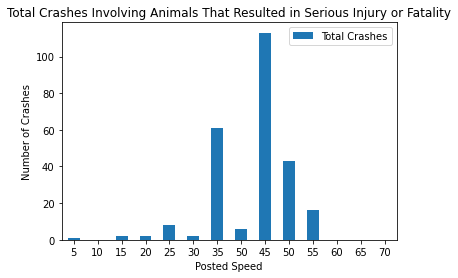

In [15]:
#Figure of crashes involving animals that resulted in serious injury or fatality, by posted speed 

#First create dataframe that captures crashes involving animals resulting in serious injury, aka incapacitating injury
seriousinvolveanimals = involveanimals[involveanimals['Incapacitating Injury'] ==1]

#Create dataframe that captures crashes involving animals resulting in fatality 
fatalinvolveanimals = involveanimals[involveanimals['Fatality'] ==1]

#Combine the two dataframes
frames =[seriousinvolveanimals, fatalinvolveanimals]
pd.concat(frames)
combinedanimals = pd.concat(frames)

#Construct bargraph with combined dataframe by posted speed 
ca5 = combinedanimals['5_mph'].sum()
ca10 = combinedanimals['10_mph'].sum() 
ca15 = combinedanimals['15_mph'].sum()
ca20 = combinedanimals['20_mph'].sum()
ca25 = combinedanimals['25_mph'].sum() 
ca30 = combinedanimals['30_mph'].sum()
ca35 = combinedanimals['35_mph'].sum() 
ca40 = combinedanimals['40_mph'].sum() 
ca45 = combinedanimals['45_mph'].sum() 
ca50 = combinedanimals['50_mph'].sum() 
ca55 = combinedanimals['55_mph'].sum() 
ca60 = combinedanimals['60_mph'].sum() 
ca65 = combinedanimals['65_mph'].sum() 
ca70 = combinedanimals['70_mph'].sum() 

df = pd.DataFrame({'Posted Speed':[5,10,15,20,25,30,35,50,45,50,55,60,65,70], 'Total Crashes':[ca5, ca10, ca15, ca20, ca25, ca30, ca35, ca40, ca45, ca50, ca55, ca60, ca65, ca70]})
ax = df.plot.bar(x='Posted Speed', y='Total Crashes', rot=0)

plt.title('Total Crashes Involving Animals That Resulted in Serious Injury or Fatality')
plt.xlabel('Posted Speed')
plt.ylabel('Number of Crashes')
#Need help formatting legend or removing legend 

# Regional Briefing Data Overview - Loop 

In [7]:
regions = analysis_2022.RGN.unique()
print(regions)

['SER' 'NER' 'MWR' 'IMR' 'NCR' 'PWR' 'AKR']


### New Regional Loop - Work in Progress 

SER
The percentage of crashes involving VRUs that resulted in a fatality or injury is 112.0
   Posted Speed  Number of Fatalities
0         5 mph                   0.0
1        10 mph                   0.0
2        15 mph                   0.0
3        20 mph                   0.0
4        25 mph                   0.0
5        30 mph                   0.0
6        35 mph                   0.0
7        40 mph                   0.0
8        45 mph                   0.0
9        50 mph                   0.0
10       55 mph                   0.0
NER
The percentage of crashes involving VRUs that resulted in a fatality or injury is 126.0
   Posted Speed  Number of Fatalities
0         5 mph                   0.0
1        10 mph                   0.0
2        15 mph                   0.0
3        20 mph                   0.0
4        25 mph                   0.0
5        30 mph                   0.0
6        35 mph                   0.0
7        40 mph                   0.0
8        45 mph   

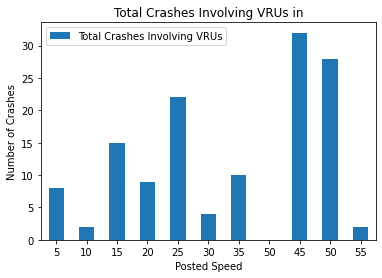

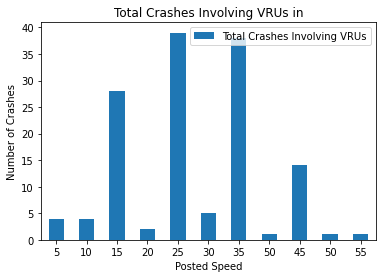

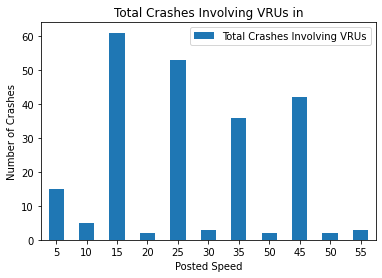

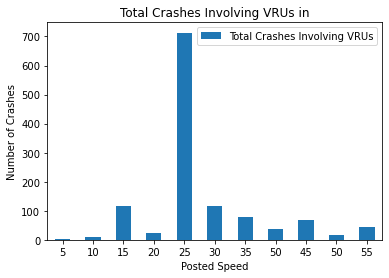

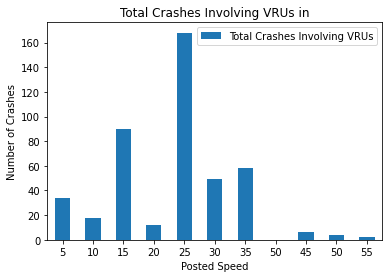

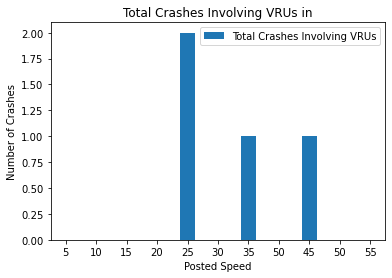

In [10]:
region = ['SER', 'NER', 'IMR', 'NCR', 'PWR', 'AKR']
for index, item in enumerate(region):
    regionabrv = region[index]
    print(regionabrv)
    regional_analysis_df = analysis_2022[analysis_2022['RGN'] == regionabrv]
    VRUreg = regional_analysis_df[regional_analysis_df['VRU'] == 1]
    injuryorfatalityVRUreg = VRUreg['Injury or Fatal'].sum()
    print("The percentage of crashes involving VRUs that resulted in a fatality or injury is", injuryorfatalityVRUreg)
    
    #Bar graph of total crashes involving VRUs sorted by posted speed
    VRU_5 = VRUreg['5_mph'].sum()
    VRU_10 = VRUreg['10_mph'].sum() 
    VRU_15 = VRUreg['15_mph'].sum()
    VRU_20 = VRUreg['20_mph'].sum() 
    VRU_25 = VRUreg['25_mph'].sum() 
    VRU_30 = VRUreg['30_mph'].sum()
    VRU_35 = VRUreg['35_mph'].sum()
    VRU_40 = VRUreg['40_mph'].sum()
    VRU_45 = VRUreg['45_mph'].sum() 
    VRU_50 = VRUreg['50_mph'].sum()
    VRU_55 = VRUreg['55_mph'].sum()
    VRU_60 = VRUreg['60_mph'].sum() 
    df = pd.DataFrame({'Posted Speed':[5,10,15,20,25,30,35,50,45,50,55], 'Total Crashes Involving VRUs':[VRU_5,VRU_10,VRU_15,VRU_20,VRU_25,VRU_30,VRU_35,VRU_40,VRU_45,VRU_50,VRU_55]})
    ax = df.plot.bar(x='Posted Speed', y='Total Crashes Involving VRUs', rot=0)
    plt.title('Total Crashes Involving VRUs in')
    plt.xlabel('Posted Speed')
    plt.ylabel('Number of Crashes')
    
    fatality_VRUreg = VRUreg[VRUreg['Fatality'] == 1]
    VRUfatal_5reg = fatality_VRUreg['5_mph'].sum()
    VRUfatal_10reg = fatality_VRUreg['10_mph'].sum() 
    VRUfatal_15reg = fatality_VRUreg['15_mph'].sum() 
    VRUfatal_20reg = fatality_VRUreg['20_mph'].sum() 
    VRUfatal_25reg = fatality_VRUreg['25_mph'].sum() 
    VRUfatal_30reg = fatality_VRUreg['30_mph'].sum() 
    VRUfatal_35reg = fatality_VRUreg['35_mph'].sum() 
    VRUfatal_40reg = fatality_VRUreg['40_mph'].sum() 
    VRUfatal_45reg = fatality_VRUreg['45_mph'].sum()
    VRUfatal_50reg = fatality_VRUreg['50_mph'].sum()
    VRUfatal_55reg = fatality_VRUreg['55_mph'].sum()
    VRUreg_fatal_postedspeed= {'Posted Speed': ['5 mph', '10 mph', '15 mph', '20 mph', '25 mph', '30 mph', '35 mph', '40 mph', '45 mph', '50 mph', '55 mph'], 'Number of Fatalities':[VRUfatal_5reg, VRUfatal_10reg, VRUfatal_15reg, VRUfatal_20reg, VRUfatal_25reg, VRUfatal_30reg, VRUfatal_35reg, VRUfatal_40reg, VRUfatal_45reg, VRUfatal_50reg, VRUfatal_55reg]}
    df13 = pd.DataFrame(VRUreg_fatal_postedspeed)
    print(df13)
    

### Old Regional Loop - Keeping for Reference Will Remove Soon 

In [29]:
region = ['SER', 'NER', 'IMR', 'NCR', 'PWR', 'AKR']
for index, item in enumerate(region):
    regionabrv = region[index]
    print(regionabrv)
    regional_analysis_df = analysis_2022[analysis_2022['RGN'] == regionabrv]
    
    #Finding Count of Injuries or Fatalities by Collision with Animal
    RGN_collisionwanimal = regional_analysis_df[regional_analysis_df['Collision w Animal'] == 1]
    RGNnuminjuries_collisionwanimals = RGN_collisionwanimal['Num_Injuries'].sum()
    RGNnumfatalities_collisionwanimals = RGN_collisionwanimal['Num_Fatalities'].sum()
    
    #Finding Count of Injuries or Fatalities by Avoiding Animal
    RGN_avoidinganimals = regional_analysis_df[regional_analysis_df['Avoiding Animal'] == 1]
    RGNnumfatalities_avoidinganimals = RGN_avoidinganimals['Num_Fatalities'].sum()
    RGNnuminjuries_avoidinganimals = RGN_avoidinganimals['Num_Injuries'].sum()
    
    #Finding Count of Injuries or Fatalities by Pedestrians 
    RGN_pedestrians = regional_analysis_df[regional_analysis_df['Pedestrian'] == 1]
    RGNpedinjuries = RGN_pedestrians['Num_Injuries'].sum()
    RGNpedfatal = RGN_pedestrians['Num_Fatalities'].sum()
    
    #Finding Count of Injuries or Fatalities by Bicyclists  
    RGN_bicyclists = regional_analysis_df[regional_analysis_df['Bicycle'] == 1]
    RGNbikeinjuries = RGN_bicyclists['Num_Injuries'].sum()
    RGNbikefatal = RGN_bicyclists['Num_Fatalities'].sum()
    
    #Finding Count of Injuries or Fatalities by Pedacyclists 
    RGN_pedacycle = regional_analysis_df[regional_analysis_df['Pedacycle'] == 1]
    RGNpedacycleinjuries = RGN_pedacycle['Num_Injuries'].sum()
    RGNpedacyclefatal = RGN_pedacycle['Num_Fatalities'].sum() 
    
    #Creating table from data 
    RGNdata= {'Collision Type': ['Collision w Animal','Avoiding Animal', 'Pedestrian','Bicycle','Pedacycle'], 'Number of Injuries':[RGNnuminjuries_collisionwanimals, RGNnuminjuries_avoidinganimals, RGNpedinjuries, RGNbikeinjuries, RGNpedacycleinjuries], 'Number of Fatalities':[RGNnumfatalities_collisionwanimals,RGNnumfatalities_avoidinganimals, RGNpedfatal, RGNbikefatal, RGNpedacyclefatal]}
    df2 = pd.DataFrame(RGNdata)
    print(df2)
    df2[['Number of Injuries', 'Number of Fatalities']].sum()
    df2.append(df2[['Number of Injuries', 'Number of Fatalities']].sum().rename('Servicewide Total')).fillna('')
    #NEED HELP: Servicewide Total Won't Show
    
    #Creating bar graph from data 
    injuries = [RGNnuminjuries_collisionwanimals, RGNnuminjuries_avoidinganimals, RGNpedinjuries, RGNbikeinjuries, RGNpedacycleinjuries]
    fatalities = [RGNnumfatalities_collisionwanimals, RGNnumfatalities_avoidinganimals, RGNpedfatal, RGNbikefatal, RGNpedacyclefatal]
    index = ['Collision with Animal', 'Avoiding Animal', 'Pedestrian', 'Bicycle', 'Pedacycle']
    df3 = pd.DataFrame({'number of injuries': injuries, 'number of fatalities':fatalities}, index=index)
    
    ax = df3.plot.bar(rot=0)
    #NEED HELP: Fix size of bar graphs so everything isn't squished 

SER


KeyError: 'Collision w Animal'

### Crashes Involving Pedestrians 

#### Computing % of Crashes Involving Pedestrians 

In [89]:
analysis_2022['Pedestrian'].value_counts().sort_index()

0    840650
1      6501
Name: Pedestrian, dtype: int64

In [90]:
pedestrian_total_crashes = 6501
print(pedestrian_total_crashes)

6501


In [91]:
analysis_2022.shape

(847151, 56)

In [92]:
pedestrian_percentage = round(pedestrian_total_crashes/847151,3)*100
pedestrian_percentage

0.8

#### Computing % of Injury/Fatality Involving Pedestrians

In [93]:
#First find the number of injury/fatalities involving pedestrians 
analysis_2022.value_counts(["Pedestrian", "Injury or Fatal"])

Pedestrian  Injury or Fatal
0           0                  666623
            1                  174027
1           0                    3451
            1                    3050
dtype: int64

In [94]:
#Pedestrian = 1 and Injury or Fatal = 1 means crash involving pedestrian resulted in injury or fatality 
pedestrian_counts= 3050
print (pedestrian_counts)

3050


In [95]:
#Percentage of Injury/Fatality for Pedestrians
pedestrian_injuryfatality_percentage = round(pedestrian_counts/pedestrian_total_crashes, 3)*100
pedestrian_injuryfatality_percentage

46.9

#### No. Fatalities Involving Pedestrians - avoiding this code for now so as not to repeat error code... 

## Crashes Involving Cyclists 

#### Computing % of Crashes Involving Cyclists 

In [96]:
analysis_2022['Bicycle'].value_counts().sort_index()

0    840685
1      6466
Name: Bicycle, dtype: int64

In [97]:
cyclists_total_crashes = 6466
print(cyclists_total_crashes)

6466


In [98]:
analysis_2022.shape

(847151, 56)

In [99]:
cyclists_percentage = round(cyclists_total_crashes/847151,3)*100
cyclists_percentage

0.8

#### Computing % of Injury/Fatality Involving Cyclists 

In [100]:
#First find the number of injury/fatalities involving cyclists 
analysis_2022.value_counts(["Bicycle", "Injury or Fatal"])

Bicycle  Injury or Fatal
0        0                  667219
         1                  173466
1        1                    3611
         0                    2855
dtype: int64

In [101]:
#Bicycle = 1 and Injury or Fatal = 1 means crash involving bicycle resulted in injury or fatality
cyclists_counts= 3611
print (cyclists_counts)

3611


In [102]:
#Percentage of Injury/Fatality Involving Cyclists
cyclists_injuryfatality_percentage = round(cyclists_counts/cyclists_total_crashes, 3)*100
cyclists_injuryfatality_percentage

55.800000000000004

#### No. Fatalities Involving Cyclists - avoiding this code for now so as not to repeat error code... 

#### Table of Crash Class and Severity - NOT READY NOT, WORK IN PROGRESS 

In [103]:
print("For an NPS service wide perspective, the TSP has aggregated available crash data from 1990 – 2020.  Available below is a list of the most common crash classifications for that time period servicewide for crashes that resulted in a fatality or an injury. A key take away is")

For an NPS service wide perspective, the TSP has aggregated available crash data from 1990 – 2020.  Available below is a list of the most common crash classifications for that time period servicewide for crashes that resulted in a fatality or an injury. A key take away is


In [104]:
#Template of code for table but got to figure out values for percentage of total crashes
#Values for 100 are fake, will be replaced soon, just put in for sake of balancing table
data= {'Collision Type': ['Collision w Animal','Avoiding Animal','Pedestrian', 'Bicycle'], 'Percentage of Total Crashes': [collision_with_animal_percentage,avoiding_animal_percentage,pedestrian_percentage,cyclists_percentage], 'Percentage in Fatality or Injury':[Collisionwanimal_injury_or_fatal, avoiding_animal_injuryfatality_percentage,pedestrian_injuryfatality_percentage,cyclists_injuryfatality_percentage]}

In [105]:
df = pd.DataFrame(data)

In [106]:
print(df)

       Collision Type  Percentage of Total Crashes  \
0  Collision w Animal                        3.100   
1     Avoiding Animal                        0.008   
2          Pedestrian                        0.800   
3             Bicycle                        0.800   

   Percentage in Fatality or Injury  
0                               6.7  
1                               9.2  
2                              46.9  
3                              55.8  


### Next section will construction bar graph of fatalities and injuries sorted by posted speed 


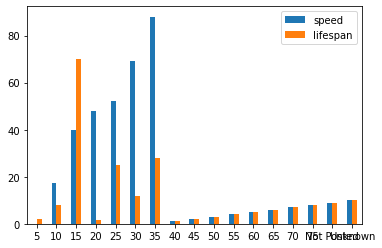

In [32]:
#TEMPLATED EXAMPLE 
fatalities = [0.1, 17.5, 40, 48, 52, 69, 88, 1,2,3,4,5,6,7,8,9,10]
injuries = [2, 8, 70, 1.5, 25, 12, 28, 1,2,3,4,5,6,7,8,9,10]
index = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75]
df = pd.DataFrame({'speed': speed,
                   'lifespan': lifespan}, index=index)
ax = df.plot.bar(rot=0)
#TEMPLATE NEED TO ADJUST - first one tests on fatalities and injuries 